In [77]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

In [79]:
# Load the Breast Cancer dataset CSV
df = pd.read_csv(r"C:\Users\91777\Internship\breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


C:\Users\91777\AppData\Local\Temp\ipykernel_31220\1344341588.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='coolwarm')


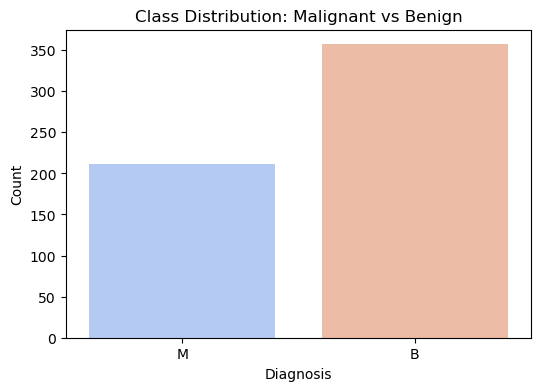

In [81]:
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df, palette='coolwarm')
plt.title("Class Distribution: Malignant vs Benign")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

In [83]:
# Encode the diagnosis column (M → 1, B → 0)
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [85]:
# Drop 'id' column if present
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

In [87]:
# Select two features for 2D visualization and classification
selected_features = ['radius_mean', 'texture_mean']
X_selected = df[selected_features].values
y = df['diagnosis'].values  # target variable

In [89]:
# Split selected features into train/test sets
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

In [91]:
# Scale the selected features
scaler_sel = StandardScaler()
X_train_sel_scaled = scaler_sel.fit_transform(X_train_sel)
X_test_sel_scaled = scaler_sel.transform(X_test_sel)

In [93]:
# Train SVM with a linear kernel on the 2 selected features
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train_sel_scaled, y_train_sel)

SVC(kernel='linear', random_state=42)

In [95]:
# Predict and evaluate on test set
y_pred_linear = svm_linear.predict(X_test_sel_scaled)
acc_linear = accuracy_score(y_test_sel, y_pred_linear)
cm_linear = confusion_matrix(y_test_sel, y_pred_linear)
report_linear = classification_report(y_test_sel, y_pred_linear, output_dict=True)

print("\n🔹 SVM (Linear Kernel) Evaluation on Selected Features")
print(f"Accuracy: {acc_linear:.4f}")
print("Confusion Matrix:")
print(pd.DataFrame(cm_linear,
                   index=['Actual Benign (0)', 'Actual Malignant (1)'],
                   columns=['Predicted Benign (0)', 'Predicted Malignant (1)']))
print("\nClassification Report:")
print(pd.DataFrame(report_linear).transpose())


🔹 SVM (Linear Kernel) Evaluation on Selected Features
Accuracy: 0.9035
Confusion Matrix:
                      Predicted Benign (0)  Predicted Malignant (1)
Actual Benign (0)                       67                        4
Actual Malignant (1)                     7                       36

Classification Report:
              precision    recall  f1-score     support
0              0.905405  0.943662  0.924138   71.000000
1              0.900000  0.837209  0.867470   43.000000
accuracy       0.903509  0.903509  0.903509    0.903509
macro avg      0.902703  0.890436  0.895804  114.000000
weighted avg   0.903367  0.903509  0.902763  114.000000


In [97]:
# Train SVM with a polynomial kernel on the same features
svm_poly = SVC(kernel='poly', degree=3, C=1.0, random_state=42)
svm_poly.fit(X_train_sel_scaled, y_train_sel)

SVC(kernel='poly', random_state=42)

In [99]:
# Predict and evaluate
y_pred_poly = svm_poly.predict(X_test_sel_scaled)
acc_poly = accuracy_score(y_test_sel, y_pred_poly)
cm_poly = confusion_matrix(y_test_sel, y_pred_poly)
report_poly = classification_report(y_test_sel, y_pred_poly, output_dict=True)

print("\n🔹 SVM (Polynomial Kernel) Evaluation on Selected Features")
print(f"Accuracy: {acc_poly:.4f}")
print("Confusion Matrix:")
print(pd.DataFrame(cm_poly,
                   index=['Actual Benign (0)', 'Actual Malignant (1)'],
                   columns=['Predicted Benign (0)', 'Predicted Malignant (1)']))
print("\nClassification Report:")
print(pd.DataFrame(report_poly).transpose())


🔹 SVM (Polynomial Kernel) Evaluation on Selected Features
Accuracy: 0.8246
Confusion Matrix:
                      Predicted Benign (0)  Predicted Malignant (1)
Actual Benign (0)                       69                        2
Actual Malignant (1)                    18                       25

Classification Report:
              precision    recall  f1-score     support
0              0.793103  0.971831  0.873418   71.000000
1              0.925926  0.581395  0.714286   43.000000
accuracy       0.824561  0.824561  0.824561    0.824561
macro avg      0.859515  0.776613  0.793852  114.000000
weighted avg   0.843203  0.824561  0.813394  114.000000


In [101]:
# Train SVM with an RBF kernel on the same features
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train_sel_scaled, y_train_sel)

SVC(random_state=42)

In [103]:
# Predict and evaluate
y_pred_rbf = svm_rbf.predict(X_test_sel_scaled)
acc_rbf = accuracy_score(y_test_sel, y_pred_rbf)
cm_rbf = confusion_matrix(y_test_sel, y_pred_rbf)
report_rbf = classification_report(y_test_sel, y_pred_rbf, output_dict=True)

In [105]:
print("\n🔹 SVM (RBF Kernel) Evaluation on Selected Features")
print(f"Accuracy: {acc_rbf:.4f}")
print("Confusion Matrix:")
print(pd.DataFrame(cm_rbf,
                   index=['Actual Benign (0)', 'Actual Malignant (1)'],
                   columns=['Predicted Benign (0)', 'Predicted Malignant (1)']))
print("\nClassification Report:")
print(pd.DataFrame(report_rbf).transpose())


🔹 SVM (RBF Kernel) Evaluation on Selected Features
Accuracy: 0.9211
Confusion Matrix:
                      Predicted Benign (0)  Predicted Malignant (1)
Actual Benign (0)                       67                        4
Actual Malignant (1)                     5                       38

Classification Report:
              precision    recall  f1-score     support
0              0.930556  0.943662  0.937063   71.000000
1              0.904762  0.883721  0.894118   43.000000
accuracy       0.921053  0.921053  0.921053    0.921053
macro avg      0.917659  0.913691  0.915590  114.000000
weighted avg   0.920826  0.921053  0.920864  114.000000


In [107]:
# Function to plot decision boundary for 2D data
def plot_decision_boundary(X, y, model, title, feature_names):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.show()

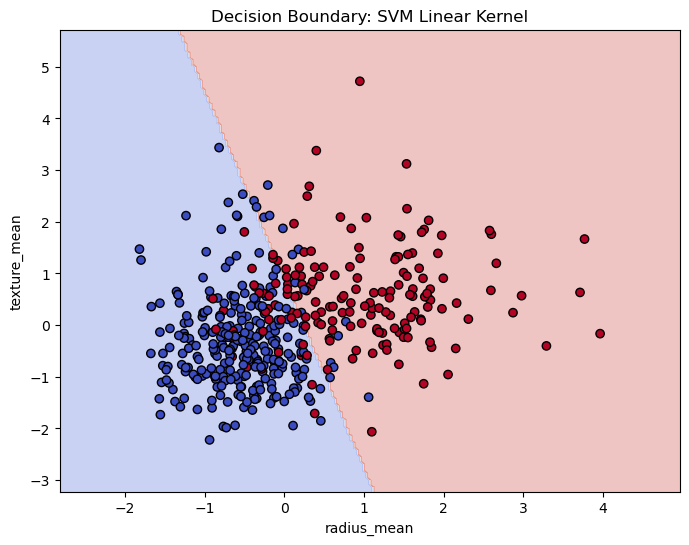

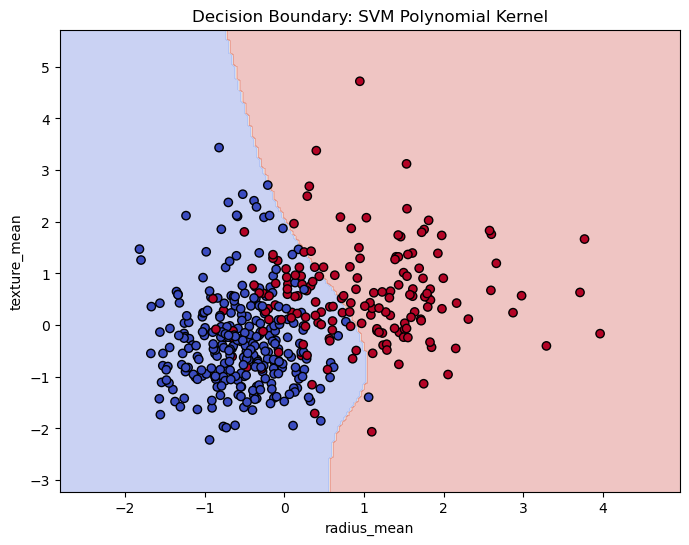

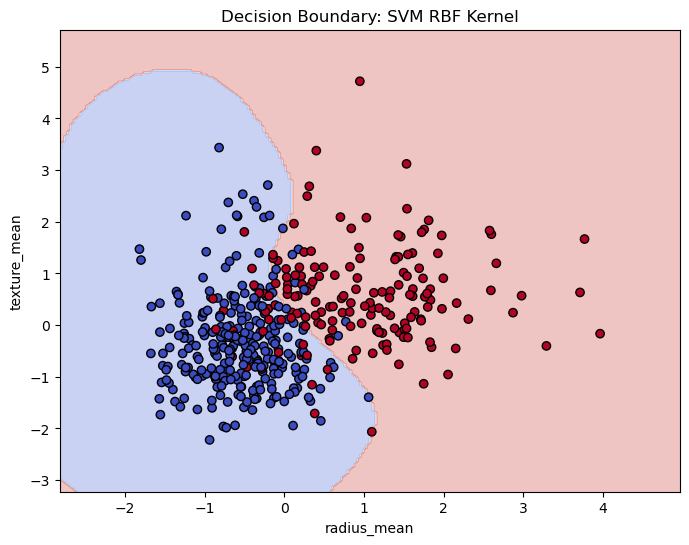

In [109]:
# Plot decision boundaries for each kernel (using training data)
plot_decision_boundary(
    X_train_sel_scaled, y_train_sel, svm_linear,
    "Decision Boundary: SVM Linear Kernel",
    selected_features
)

plot_decision_boundary(
    X_train_sel_scaled, y_train_sel, svm_poly,
    "Decision Boundary: SVM Polynomial Kernel",
    selected_features
)

plot_decision_boundary(
    X_train_sel_scaled, y_train_sel, svm_rbf,
    "Decision Boundary: SVM RBF Kernel",
    selected_features
)

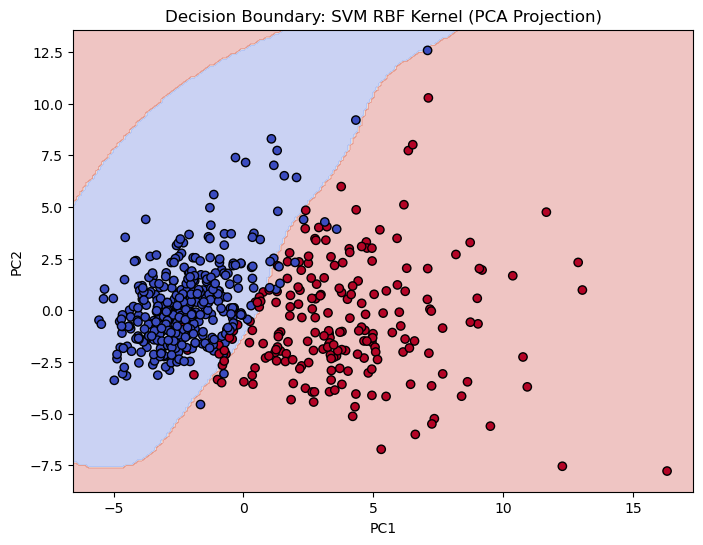

In [110]:
# Now, reduce full feature set to 2D via PCA for global visualization
X_full = df.drop(columns=['diagnosis']).values
y_full = df['diagnosis'].values

scaler_full = StandardScaler()
X_full_scaled = scaler_full.fit_transform(X_full)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_full_scaled)

# Split PCA-reduced data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y_full, test_size=0.2, random_state=42
)

# Train RBF SVM on PCA-reduced data
svm_pca = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_pca.fit(X_train_pca, y_train_pca)

# Plot decision boundary on PCA-reduced entire dataset
plot_decision_boundary(
    X_pca, y_full, svm_pca,
    "Decision Boundary: SVM RBF Kernel (PCA Projection)",
    ['PC1', 'PC2']
)


In [112]:
# Hyperparameter tuning for RBF SVM on the full feature set
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.001, 1],
    'kernel': ['rbf']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_sel_scaled, y_train_sel)

print("\n🔧 Hyperparameter Tuning Results (RBF Kernel on Selected Features)")
print("Best Parameters:", grid_search.best_params_)
print(f"Best CV Score: {grid_search.best_score_:.4f}")



🔧 Hyperparameter Tuning Results (RBF Kernel on Selected Features)
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Score: 0.8989


In [114]:
# Cross-validation using the best model on the full scaled dataset
best_svm = grid_search.best_estimator_
cv_scores = cross_val_score(best_svm, X_full_scaled, y_full, cv=5)

print("\n🔁 Cross-Validation Accuracy Scores (Full Feature Set):", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")



🔁 Cross-Validation Accuracy Scores (Full Feature Set): [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Mean CV Accuracy: 0.9736
